In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numexpr as ne
from pandas.tseries.offsets import MonthEnd

# Problem 1

In [4]:
# Creating DataFrame
sp500 = pd.read_csv('weni7z9lm0qu7sul.csv')

In [5]:
sp500.shape

(1165, 11)

In [6]:
sp500.head()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN
1,1926-01-30,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472
2,1926-02-27,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688


In [7]:
sp500.columns

Index(['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt',
       'usdval', 'usdcnt', 'spindx', 'sprtrn'],
      dtype='object')

In [8]:
infla = pd.read_csv('vif61oycy9y6jf7b.csv')

In [9]:
infla.shape

(1165, 11)

In [10]:
infla.head()

,caldt,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
0,1925-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004042,0.002951,0.000000
2,1926-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003237,0.002768,0.000000
3,1926-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002778,0.002778,-0.005587
4,1926-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,0.003072,0.005618


In [11]:
infla.columns

Index(['caldt', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret',
       'b1ret', 't90ret', 't30ret', 'cpiret'],
      dtype='object')

In [13]:
sp500['caldt'] = pd.to_datetime(sp500['caldt'])
sp500['caldt'] = pd.to_datetime(sp500['caldt'], format="%Y%m") + MonthEnd(0)

In [14]:
sp500.head()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN
1,1926-01-31,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472
2,1926-02-28,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688


In [15]:
infla['caldt'] = pd.to_datetime(infla['caldt'])
infla['caldt'] = infla['caldt'] + MonthEnd(0)

In [16]:
merged = pd.merge(sp500, infla, on = 'caldt', how = 'inner')
merged.shape

(1165, 21)

In [17]:
merged.shape

(1165, 21)

In [18]:
merged.columns

Index(['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt',
       'usdval', 'usdcnt', 'spindx', 'sprtrn', 'b30ret', 'b20ret', 'b10ret',
       'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret', 'cpiret'],
      dtype='object')

In [19]:
pd.set_option('display.max_columns', None)
merged.head()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-31,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004042,0.002951,0.000000
2,1926-02-28,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003237,0.002768,0.000000
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002778,0.002778,-0.005587
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,0.003072,0.005618


In [20]:
# Calculating nominal returns, not adjusted for inflation
sp500_nominal_returns = merged['vwretd']
sp500_cum = (1 + sp500_nominal_returns).cumprod()
t30_nominal_returns = merged['t30ret']
t30_cum = (1 + t30_nominal_returns).cumprod()
t90_nominal_returns = merged['t90ret']
t90_cum = (1 + t90_nominal_returns).cumprod()
b1_nominal_returns = merged['b1ret']
b1_cum = (1 + b1_nominal_returns).cumprod()
b2_nominal_returns = merged['b1ret']
b2_cum = (1 + b2_nominal_returns).cumprod()
b5_nominal_returns = merged['b5ret']
b5_cum = (1 + b5_nominal_returns).cumprod()
b7_nominal_returns = merged['b7ret']
b7_cum = (1 + b7_nominal_returns).cumprod()
b10_nominal_returns = merged['b10ret']
b10_cum = (1 + b10_nominal_returns).cumprod()
b20_nominal_returns = merged['b20ret']
b20_cum = (1 + b20_nominal_returns).cumprod()
b30_nominal_returns = merged['b30ret']
b30_cum = (1 + b30_nominal_returns).cumprod()

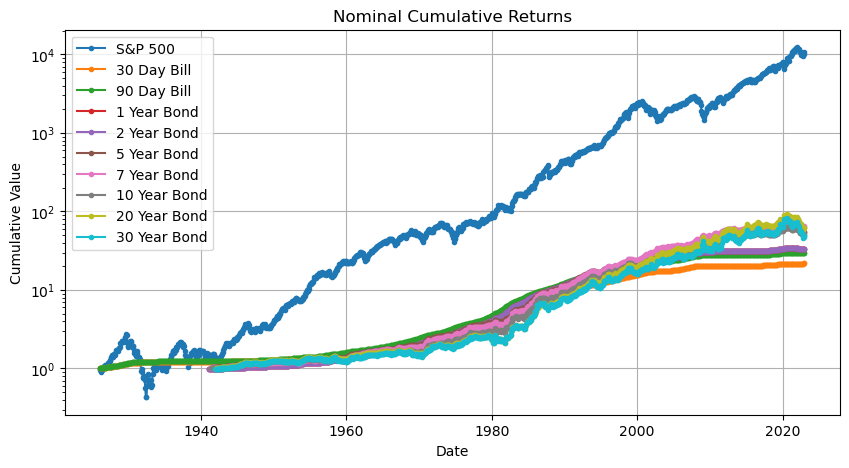

In [24]:
# Plotting nominal returns with a log-scale on the y-axis. I probably could've used a loop for less lines of code here...
plt.figure(figsize=(10, 5))
plt.title('Nominal Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
plt.semilogy(merged['caldt'], sp500_cum, label='S&P 500', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], t30_cum, label='30 Day Bill', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], t90_cum, label='90 Day Bill', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b1_cum, label='1 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b2_cum, label='2 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b5_cum, label='5 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b7_cum, label='7 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b10_cum, label='10 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b20_cum, label='20 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b30_cum, label='30 Year Bond', linestyle='-', marker='o', markersize=3)
plt.legend()

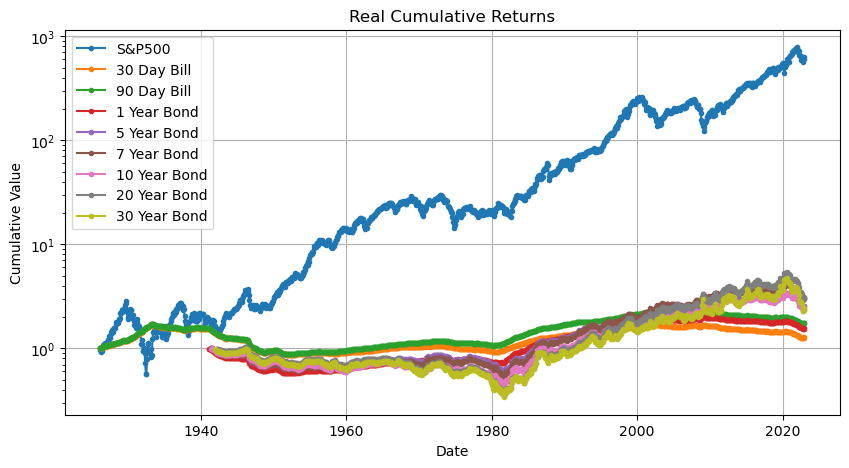

In [35]:
# Calculating real returns, adjusted for inflation
investments = ['vwretd', 't30ret', 't90ret', 'b1ret', 'b5ret', 'b7ret', 'b10ret', 'b20ret', 'b30ret']
names = {'vwretd': 'S&P500', 't30ret': '30 Day Bill', 't90ret': '90 Day Bill', 'b1ret': '1 Year Bond', 'b2ret': '2 Year Bond', 'b5ret': 
         '5 Year Bond', 'b7ret': '7 Year Bond', 'b10ret': '10 Year Bond', 'b20ret': '20 Year Bond', 'b30ret': '30 Year Bond'}
plt.figure(figsize=(10, 5))
plt.title('Real Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
for i in investments:
    merged[i + ' adjusted'] = 1 + (merged[i] - merged['cpiret'])
    real_returns = merged[i + ' adjusted'].cumprod()
    plt.semilogy(merged['caldt'], real_returns, label= names[i], linestyle='-', marker='o', markersize=3)
plt.legend()
plt.show()    